# Machine Learning - Correlation

In [1]:
# https://github.com/marybun/machine_learning

In [11]:
import numpy as np
from numpy import linalg as la
from scipy.io import loadmat
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

### i. Correlation Matrix

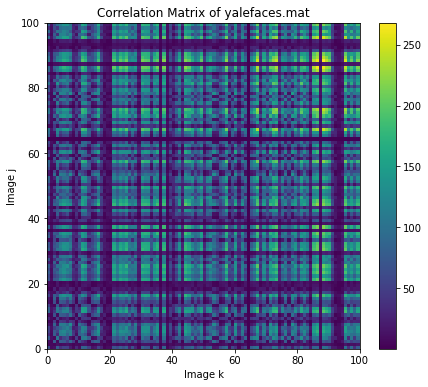

In [12]:
# Compute the correlation matrix C
C = np.zeros((100, 100))

for j in range(100):
    for k in range(100):
        C[j, k] = X[:, j].T @ X[:, k]

# Purple indicates low correlation, red indicates high correlation
plt.figure(figsize=(7,6))
plt.pcolor(C)
plt.title('Correlation Matrix of yalefaces.mat')
plt.xlabel('Image k')
plt.ylabel('Image j')
plt.colorbar()
plt.show()

### ii. Correlated Images

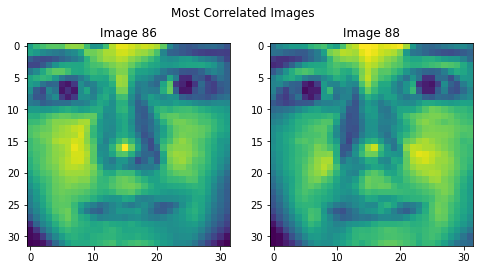

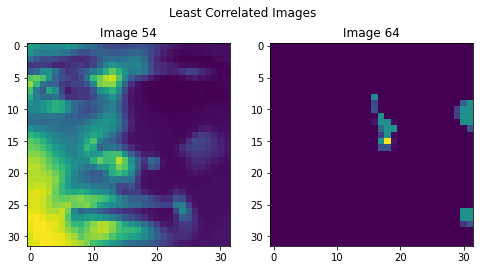

In [13]:
# We only need one triangle of the matrix to get the correlations between every image
C_triu = np.triu(C, 1)

# Find the indicies for the most correlated images
C_maxcorr_idx = np.unravel_index(np.argmax(C_triu), C.shape)

# Set the values of the diagonal and below to 1000 so np.min finds the min within the upper triangle
C_triu += 1000*np.tril(np.ones((100, 100)))
# Find the indicies for the least correlated images
C_mincorr_idx = np.unravel_index(np.argmin(C_triu), C.shape)

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(X[:, C_maxcorr_idx[0]].reshape(32,32))
plt.title('Image ' + str(C_maxcorr_idx[0]))
plt.subplot(122)
plt.imshow(X[:, C_maxcorr_idx[1]].reshape(32,32))
plt.title('Image ' + str(C_maxcorr_idx[1]))
plt.suptitle('Most Correlated Images')
plt.show()

plt.figure(figsize=(8,4))
plt.subplot(121)
plt.imshow(X[:, C_mincorr_idx[0]].reshape(32,32))
plt.title('Image ' + str(C_mincorr_idx[0]))
plt.subplot(122)
plt.imshow(X[:, C_mincorr_idx[1]].reshape(32,32))
plt.title('Image ' + str(C_mincorr_idx[1]))
plt.suptitle('Least Correlated Images')
plt.show()

### iii. 10x10 Correlation Matrix

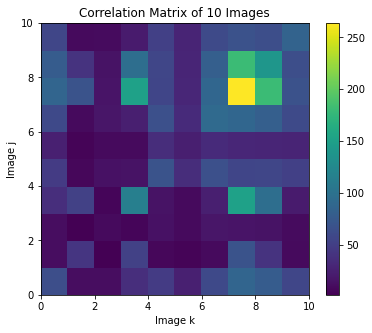

In [14]:
# Compute 10x10 correlation matrix between images 0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004
X_10 = X[:, [0, 312, 511, 4, 2399, 112, 1023, 86, 313, 2004]]
C_10 = np.zeros((10, 10))

for j in range(10):
    for k in range(10):
        C_10[j, k] = X_10[:, j].T @ X_10[:, k]

# Purple indicates low correlation, red indicates high correlation
plt.figure(figsize=(6,5))
plt.pcolor(C_10)
plt.xlabel('Image k')
plt.ylabel('Image j')
plt.title('Correlation Matrix of 10 Images')
plt.colorbar()
plt.show()

In [15]:
# Y = XX^T
Y = X @ X.T

# Find the first six eigenvectors with the largest eigenvalues
w, v = la.eig(Y)
np.shape(v[:, 0:6])
print(v[:, 0:6])

[[ 0.02384327  0.04535378  0.05653196  0.04441826 -0.03378603  0.02207542]
 [ 0.02576146  0.04567536  0.04709124  0.05057969 -0.01791442  0.03378819]
 [ 0.02728448  0.04474528  0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [ 0.02082937 -0.03737158  0.06455006 -0.01006919  0.06172201  0.03025485]
 [ 0.0193902  -0.03557383  0.06196898 -0.00355905  0.05796353  0.02850199]
 [ 0.0166019  -0.02965746  0.05241684  0.00040934  0.05757412  0.00941028]]


### iv. Singular Value Decomposition

In [16]:
# Use SVD to find the first six principle component directions
u, s, vh = la.svd(X)
print(u[:, 0:6])

[[-0.02384327  0.04535378  0.05653196 -0.04441826  0.03378603 -0.02207542]
 [-0.02576146  0.04567536  0.04709124 -0.05057969  0.01791442 -0.03378819]
 [-0.02728448  0.04474528  0.0362807  -0.05522219  0.00462854 -0.04487476]
 ...
 [-0.02082937 -0.03737158  0.06455006  0.01006919 -0.06172201 -0.03025485]
 [-0.0193902  -0.03557383  0.06196898  0.00355905 -0.05796353 -0.02850199]
 [-0.0166019  -0.02965746  0.05241684 -0.00040934 -0.05757412 -0.00941028]]


In [17]:
# Compare the first eigenvector with the first SVD mode
print(la.norm(abs(v[:, 0]) - abs(u[:, 0])))

7.51892072605625e-16


Variance for mode 0 = 16.614046686527438 %
Variance for mode 1 = 7.605298911138135 %
Variance for mode 2 = 3.1168860138255963 %
Variance for mode 3 = 2.6657683644942196 %
Variance for mode 4 = 1.5555497307794566 %
Variance for mode 5 = 1.4974371809143299 %


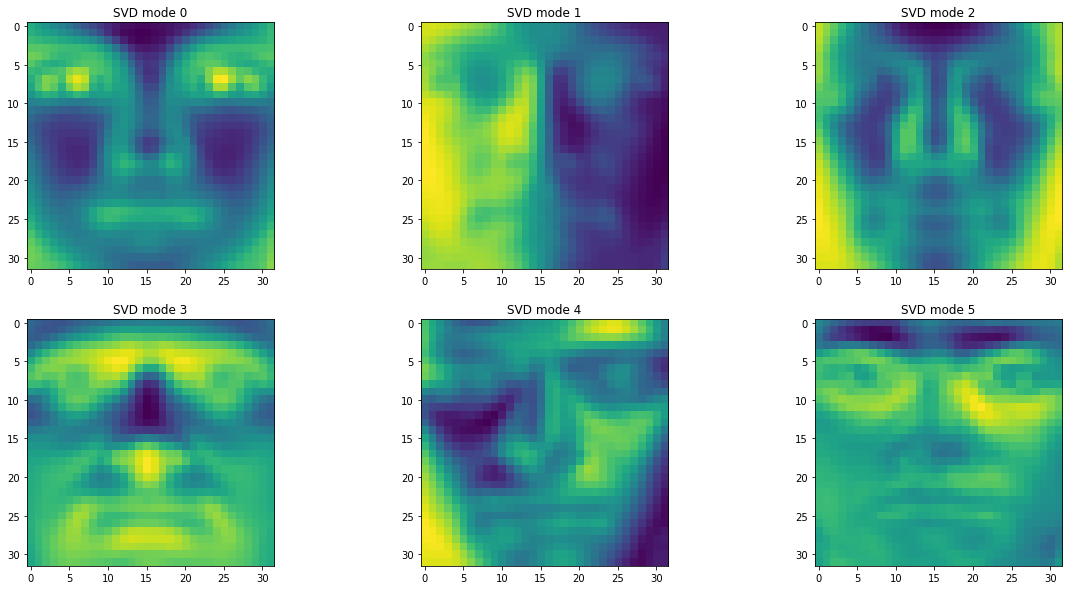

In [18]:
# Calculate the percentage of variance of each of the first 6 SVD modes
for mode in range(6):
    print('Variance for mode', str(mode), '=', 100 * (s[mode] / np.sum(s)), '%')

# Plot the first 6 SVD modes
plt.figure(figsize=(20, 10))
for i in np.arange(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(u[:, i].reshape(32,32))
    plt.title('SVD mode ' + str(i))

In [19]:
np.shape(X)

(1024, 2414)

In [28]:
u, s, vh = la.svd(X, full_matrices=True)

In [32]:
np.shape(u * s @ vh)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2414 is different from 1024)

In [31]:
np.shape(vh)

(2414, 2414)